In [1]:
# Import libraries
import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import seaborn as sns

In [10]:
# Combine all yearly traffic volume data

folder_path = "../cleaned_data"
traffic_df = pd.DataFrame()

for file_name in os.scandir(folder_path):
    df = pd.read_csv(file_name.path)
    traffic_df = pd.concat([traffic_df, df], ignore_index=True)

# Add datetime column
traffic_df.rename(columns={"Date": "Day", "Day": "Weekday", "Weekday": "Weekday_Y_N"}, inplace=True)
traffic_df["Datetime"] = pd.to_datetime(traffic_df[["Year", "Month", "Day"]])

binary_dict = {True: 1, False: 0}
traffic_df["Weekday_Y_N_0"] = traffic_df["Weekday_Y_N"].map(binary_dict)
traffic_df.drop(columns=["Weekday_Y_N"], inplace=True)
traffic_df.rename(columns={"Weekday_Y_N_0": "Weekday_Y_N"}, inplace=True)


In [12]:
traffic_df.to_csv("../cleaned_data/all_traffic_volume.csv", index=False)

In [ ]:
traffic_df.to_csv("../cleaned_data/all_traffic_volume.csv", index=False)

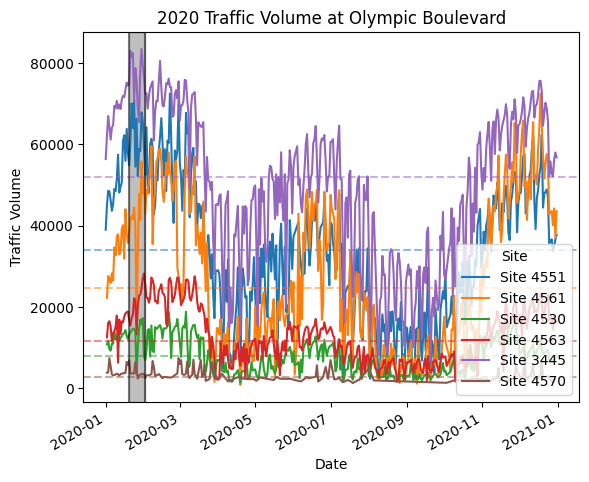

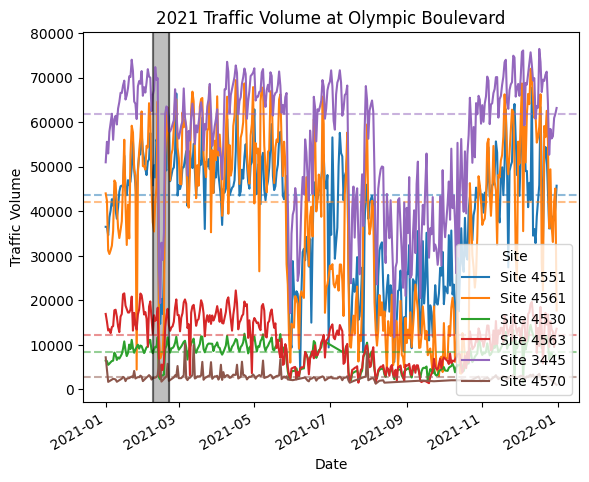

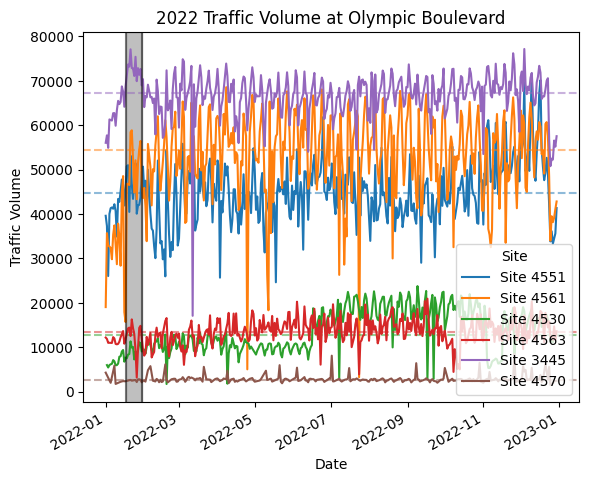

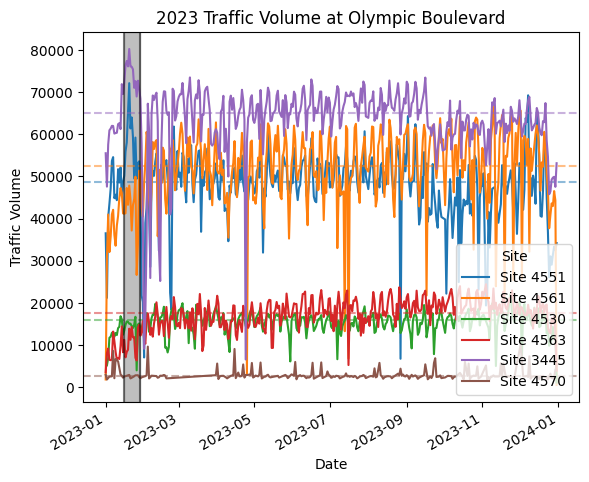

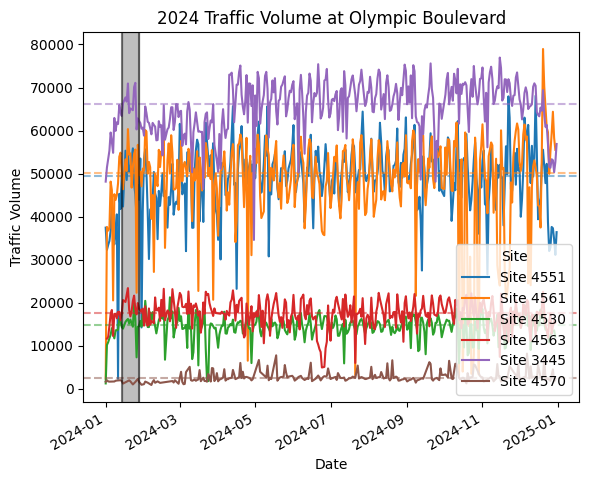

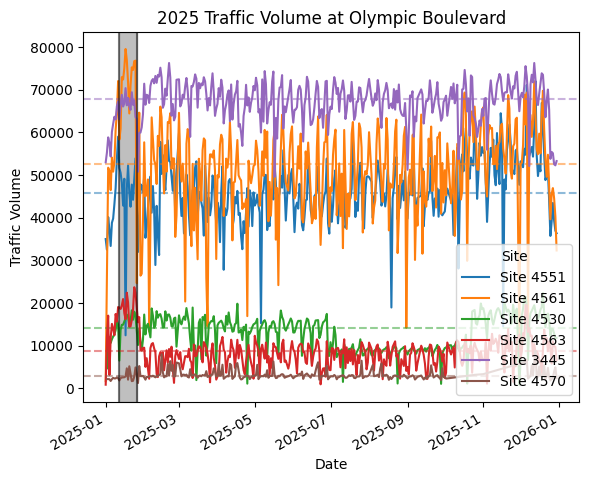

In [ ]:
# Plot yearly traffic volume including AO dates

years = [2020, 2021, 2022, 2023, 2024, 2025]

ao_dates = {
    2020: [datetime.datetime(2020, 1, 20), datetime.datetime(2020, 2, 2)],
    2021: [datetime.datetime(2021, 2, 8), datetime.datetime(2021, 2, 21)],
    2022: [datetime.datetime(2022, 1, 17), datetime.datetime(2022, 1, 30)],
    2023: [datetime.datetime(2023, 1, 16), datetime.datetime(2023, 1, 29)],
    2024: [datetime.datetime(2024, 1, 14), datetime.datetime(2024, 1, 28)],
    2025: [datetime.datetime(2025, 1, 12), datetime.datetime(2025, 1, 26)]
}

transport_dict = {"Taxi": {"Olympic Boulevard": [3445, 4551], "Flinders Street Station": [4530, 4561, 4563, 4570]},
                  "Rideshare": {"Olympic Boulevard": [3445, 4551]}}
                  # "Car": {"Yarra Park": [1052, 1586, 3391, 4452]}}

# Collate all sites into a list
site_lst = []
for outer_key in transport_dict.keys():
    for lst in transport_dict[outer_key].values():
        site_lst += lst
site_lst = list(set(site_lst))

for year in years:
    plt.figure()
    
    for site_num in site_lst:
        oly_bld = traffic_df[(traffic_df["Year"] == year) &
                             (traffic_df["Site Number"] == site_num)]

        line, = plt.plot(oly_bld["Datetime"], 
                 oly_bld["Total Traffic Volume"],
                 label=f"Site {site_num}")
        color = line.get_color()

        q50 = oly_bld["Total Traffic Volume"].quantile(0.5)
        plt.axhline(y=q50, ls="--", alpha=0.5, label="_nolegend_", color=color)

    plt.axvline(x=ao_dates[year][0], color="black", alpha=0.5, label="_nolegend_")
    plt.axvline(x=ao_dates[year][1], color="black", alpha=0.5, label="_nolegend_")
    plt.axvspan(ao_dates[year][0], ao_dates[year][1], color="gray", alpha=0.5)

    plt.title(f"{year} Traffic Volume at Olympic Boulevard")
    plt.xlabel("Date")
    plt.ylabel("Traffic Volume")
    plt.xticks(rotation=30, ha="right")

    plt.legend(title="Site", loc="lower right")

Notes:

- Site 3445 is closer to the designated pick-up and drop-off zone for rideshare patrons
- Majority of 2020 experienced the COVID-19 pandemic, thus traffic was significantly reduced after March
- In 2021, Victoria was slowly exiting quarantine conditions, however there was a significant drop in traffic volume during the 2021 AO dates. This may be due to road cutoffs to maintain any existing quarantine conditions, however, further research needs to be conducted to confirm
- In 2022 and 2023, traffic volume at site 3445 during the AO dates was consistently high throughout the year compared to other dates 
- However, in 2024 and 2025, AO dates experienced evidently lower traffic volume compared to other periods throughout the year
- More traffic consistently occurs at site 3445 than site 4551

In [ ]:
for i in range(8, 32, 3):
    traffic_df[f"Traffic Hour {i-7}-{i-5}"] = traffic_df.iloc[:, i:i+3].sum(axis=1)

traffic_df

,Site Number,Year,Month,Day,Weekday,Weekday_Y_N,Number of Recorded Periods,Total Traffic Volume,Traffic Hour 1,Traffic Hour 2,...,Weekday_Y_N,Datetime,Traffic Hour 1-3,Traffic Hour 4-6,Traffic Hour 7-9,Traffic Hour 10-12,Traffic Hour 13-15,Traffic Hour 16-18,Traffic Hour 19-21,Traffic Hour 22-24
0,1052,2023,1,1,6,False,384,5618,284,314,...,1,2023-01-01,888,462,412,808,788,757,678,8890
1,1052,2023,1,2,0,True,96,1743,38,41,...,1,2023-01-02,101,91,187,379,320,253,233,2233
2,1052,2023,1,3,1,True,96,2994,26,27,...,1,2023-01-03,70,126,387,540,559,572,439,2388
3,1052,2023,1,4,2,True,192,4699,66,62,...,1,2023-01-04,156,209,585,902,830,915,592,4665
4,1052,2023,1,5,3,True,192,5071,86,50,...,1,2023-01-05,166,226,649,925,881,968,639,4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18021,4570,2021,12,20,0,True,96,2947,63,32,...,1,2021-12-20,125,154,478,521,496,447,404,2359
18022,4570,2021,12,21,1,True,96,2810,14,13,...,1,2021-12-21,38,145,455,488,497,483,441,2381
18023,4570,2021,12,23,3,True,96,2970,30,13,...,1,2021-12-23,66,117,400,497,508,495,498,2492
18024,4570,2021,12,24,4,True,96,2728,25,15,...,1,2021-12-24,55,124,367,479,451,420,429,2474


In [ ]:
for site_num in [3445, 4551]:
    dfs = []
    for year in years:
        yearly_traffic = traffic_df[(traffic_df["Year"] == year) &
                             (traffic_df["Site Number"] == site_num) &
                             (traffic_df["Datetime"] >= ao_dates[year][0]) &
                             (traffic_df["Datetime"] <= ao_dates[year][1])].copy()

        yearly_traffic.reset_index(inplace=True)
        yearly_traffic["AO Day"] = yearly_traffic.index + 1
        
        ao_traffic = dfs.append(yearly_traffic[["Year", "AO Day", "Datetime", "Total Traffic Volume"] + list(traffic_df.columns[-8:])])
ao_traffic = pd.concat(dfs, ignore_index=True)
ao_traffic

,Year,AO Day,Datetime,Total Traffic Volume,Traffic Hour 1-3,Traffic Hour 4-6,Traffic Hour 7-9,Traffic Hour 10-12,Traffic Hour 13-15,Traffic Hour 16-18,Traffic Hour 19-21,Traffic Hour 22-24
0,2020,1,2020-01-20,54857,1042,5203,10032,8929,9216,8695,7030,21153
1,2020,2,2020-01-21,60770,1268,5572,10559,9595,9856,9544,8111,24048
2,2020,3,2020-01-22,70021,1931,5531,10986,11325,11731,11941,9129,31143
3,2020,4,2020-01-23,63964,1815,5233,10502,10364,10614,9905,8564,26536
4,2020,5,2020-01-24,70941,2139,5732,11676,10811,12018,11233,9286,31565
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2025,11,2025-01-22,47755,2323,4432,8202,7582,7724,7404,5603,18251
79,2025,12,2025-01-23,44194,1106,4168,7496,6709,7413,6871,5953,16304
80,2025,13,2025-01-24,48965,1529,4521,8321,8154,8504,7074,5866,20788
81,2025,14,2025-01-25,53902,2273,2697,6518,9132,9588,9624,7408,26504


([<matplotlib.axis.XTick at 0x747a24cc6cf0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

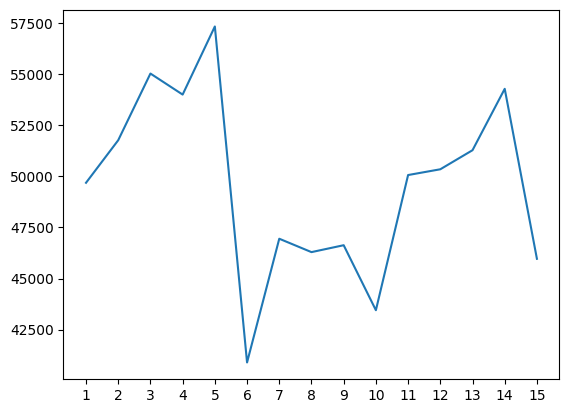

In [ ]:
# Average traffic volume across AO days
df = ao_traffic.groupby("AO Day", as_index=False).mean()

plt.plot(df["AO Day"], df["Total Traffic Volume"])
plt.xticks(df["AO Day"])

Increasing traffic volume from day 1 to 5 until a significant drop on day 6 with a steady decrease to day 15 which experiences on average less traffic volume than the first 5 days.

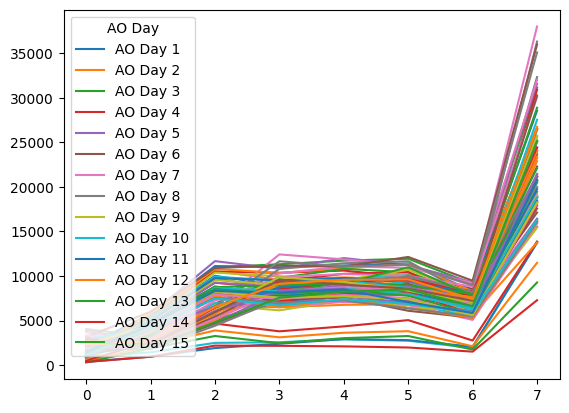

In [ ]:
# Daily traffic volume during AO dates every year
x = range(8)
seen = set()

for i in range(len(ao_traffic)):
    y = ao_traffic.iloc[i, -8:].values
    ao_day = ao_traffic.iloc[i]["AO Day"]

    label = f"AO Day {ao_day}" if ao_day not in seen else "_nolegend_"
    seen.add(ao_day)

    plt.plot(x, y, label=label)

plt.legend(title="AO Day")

Consistent traffic volume between 6am and 6pm until a slight drop at 6-9pm and then a significant increase at 9pm-12am, perhaps signifying the leave of patrons after late games.

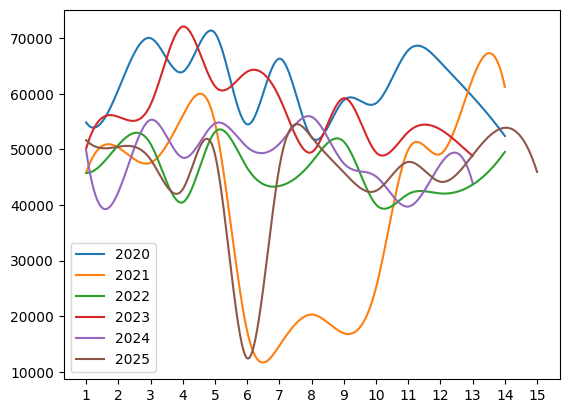

In [ ]:
# Traffic volume across AO dates
for year in years:
    df = ao_traffic[ao_traffic["Year"] == year] 

    x = df["AO Day"]
    y = df["Total Traffic Volume"]

    X_Y_Spline = make_interp_spline(x, y)

    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)

    plt.plot(X_, Y_, label=year)
    plt.xticks(x)
    plt.legend()

- Traffic volume drops during and just after the COVID-19 pandemic and seems to start growing again before plumetting from 2023
- 2023 is missing a day and 2024 is missing 2 days

<Axes: >

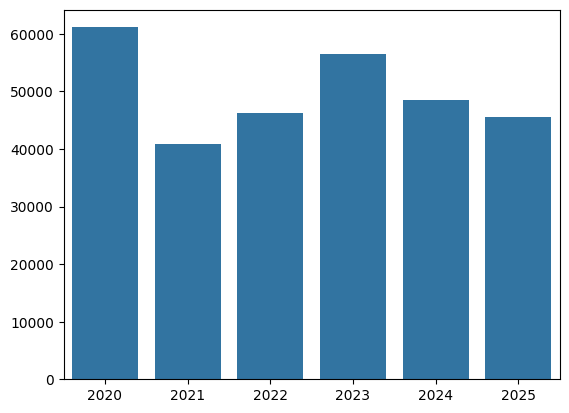

In [ ]:
# Average traffic volume each AO year
ao_traffic_mean = {}

for year in years:
    mean = ao_traffic[ao_traffic["Year"] == year]["Total Traffic Volume"].mean()
    ao_traffic_mean[year] = mean

sns.barplot(x=ao_traffic_mean.keys(), y=ao_traffic_mean.values())

Conduct an ANOVA test where the continuous dependent variable is traffic volume and the categorical variable is the AO dates (vs non-AO dates). 

What hour(s) of the day during AO dates do rideshare patrons come?
Traffic volume decreased over the year during AO dates (are patrons being effectively encourgaed to take other means of transport), compare to other variables and find reasons for this
- Do weekends affect traffic volume during AO dates?
- What days of the AO witness the most traffic volume?
